# Classification

## The Classification Problem

Given a dataset $\{(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots, (\boldsymbol{x}_N,y_N)\}$, where the $y$ are categorical (sometimes refered to as $\textit{qualitative}$), we would like to be able to predict which category $y$ takes on given $x$.  Linear regression does not work well, or is not appropriate at all, in this setting.  A categorical variable $y$ could be enocded to be quantitative.  For example, if $Y$ represents concentration of Harvard undergrads, then $y$ could take on the values:

$$ y = \left \{ \begin{array}{ll}
1 &  if \text{ Computer Science (CS)} \\
2 &  if \text{ Statistics} \\
3 &  \text{otherwise} \end{array}. \right. $$

A linear regression could be used to predict $y$ from $\boldsymbol{x}$.  What would be wrong with such a model?  The model would imply a specific ordering of the outcome, and would treat a one-unit change in y equivalent.  The jump from $y=1$ to $y=2$ (CS to Statistics) should not be interpreted as the same as a jump from $y=2$ to $y=3$ (Statistics to everyone else).  Similarly, the response variable could be reordered such that $y=1$ represents Statistics and $y=2$ represents CS, and then the model estimates and predictions would be fundamentally different.  If the categorical response variable was $\textit{ordinal}$ (had a natural ordering...like class year, Freshman, Sophomore, etc...), then a linear regression model would make some sense but is still not ideal.

The simplest form of classification is when the response variable $Y$ has only two categories, and then an ordering of the categories is natural.  For example, an upperclassmen Harvard student could be categorized as (note, the $y=0$ category is a "catch-all" so it would involve both River House students and those who live in other situations: off campus, etc...):

$$ y = \left \{ \begin{array}{ll}
1 &  if \text{ lives in the Quad} \\
0 &  \text{otherwise} \end{array}. \right. $$

Linear regression could be used to predict $y$ directly from a set of covariates (like sex, whether an athlete or not, concentration, GPA, etc...), and if $\hat{y}\geq0.5$, we could predict the student lives in the Quad and predict other houses if $\hat{y}<0.5$.

What could go wrong with this linear regression model?  The main issue is you could get non-sensical values for $\hat{y}$.  Since this is modeling $P(y=1)$, values for $\hat{y}$ below 0 and above 1 would be at odds with the natural measure for $y$, and linear regression can lead to this issue.



# Logistic Regression 

## Logistic Regression Basics


Logistic Regression addresses the problem of estimating a probability, $P(y=1)$, to be outside the range of $[0,1]$. The logistic regression model uses a function, called the $\textit{logistic}$ function, to model $P(Y=1)$:
$$ P(Y=1) = \frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}.$$
As a result the model will predict $P(Y=1)$ with an $S$-shaped curve, as seen below, which is the general shape of the logistic function.  $\beta_0$ shifts the curve right or left and $\beta_1$ controls how steep the S-shaped curve is.  Note: if $\beta_1$ is positive, then the pedicted $ P(Y=1)$ goes from zero for small values of $X$ to one for large values of $X$ and if $\beta_1$ is negative, then $ P(Y=1)$ goes from one for small values of $X$ to zero for large values of $X$.

With a little bit of algebraic work, the logistic model can be rewritten as:
$$ \ln\left(\frac{P(Y=1)}{1-P(Y=1)}\right) = \beta_0+\beta_1 X.$$
The value inside the natural log function, $P(Y=1)/(1-P(Y=1))$, is called the $\textit{odds}$, thus logistic regression is said to model the $\textit{log-odds}$ with a linear function of the predictors or features, $X$.  This gives us the natural interpretation of the estimates similar to linear regression: a one unit change in $X$ is associated with a $\beta_1$ change in the log-odds of $Y=1$; or better yet, a one unit change in $X$ is associated with an $e^\beta_1$ change in the odds that $Y=1$.  

Below are four different logistic models with different values for $\beta_0$ and $\beta_1$: $\beta_0 = 0, \beta_1 = 1$ is in black, $\beta_0 = 2, \beta_1 = 1$ is in red, $\beta_0 = 0, \beta_1 = 3$ is in blue, and $\beta_0 = 0, \beta_1 = -1$ is in green.

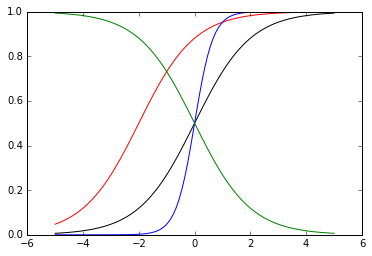

In [62]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib

x = np.linspace(-5, 5, 100)
y1 = np.exp(0+1*x)/(1+np.exp(0+1*x))
y2 = np.exp(2+1*x)/(1+np.exp(2+1*x))
y3 = np.exp(0+3*x)/(1+np.exp(0+3*x))
y4 = np.exp(0-1*x)/(1+np.exp(0-1*x))


plt.plot(x,y1,color='black')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='blue')
plt.plot(x,y4,color='green')

plt.show()

In [63]:




#read the NFL play-by-play data
nfldata = pd.read_csv("NFLplaybyplay-2015.csv")

# shuffle the data
nfldata = nfldata.reindex(np.random.permutation(nfldata.index))

# For simplicity, we will select only 500 points form the dataset.
N = 500
nfldata_sm = nfldata.sample(N)
print(nfldata_sm[1:5])






           GameId  GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  \
17303  2015100411   10/4/15        2      13      57         MIN         DEN   
4825   2015122701  12/27/15        1       5      19         MIA         IND   
45216  2015122704  12/27/15        1      11      33          KC         CLE   
28439  2015110804   11/8/15        4      10      35         BUF         MIA   

       Down  ToGo  YardLine      ...       IsTwoPointConversion  \
17303     2    10        48      ...                          0   
4825      1    10        69      ...                          0   
45216     1    10        62      ...                          0   
28439     1    10        64      ...                          0   

       IsTwoPointConversionSuccessful  RushDirection  YardLineFixed  \
17303                               0     LEFT GUARD             48   
4825                                0            NaN             31   
45216                               0       LEFT E

## Estimation in Logistic Regression 

In order to estimate the logistic regression parameters, $\beta_0$ and $\beta_1$, from real data, the method of maximum likelihood is used.  The method of maximum likelihood attempts to choose the best values for the parameters which optimizes (maximizes) the joint pdf for the data based on some distributional assumption.  Here, the assumption is that the data, $Y$, are being generated from a Bernoulli distribution with parameter dependent on $\beta_0$ and $\beta_1$, specifically:

Since the observations can be reasonably assumed to be independent, these individual observations contribute to the overall joint PMB by multiplying together.  This PMF is then viewed from the perspective that $\beta_0$ and $\beta_1$ are unknown, and thus the best choices for them are those that maximize this likelihood function.

Estimated beta1: 
 [[ 0.07234665]]
Estimated beta0: 
 [-8.10135283]


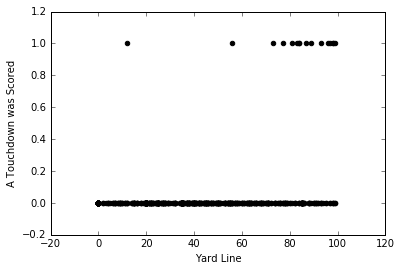

In [87]:

# The following function creates the polynomial design matrix.
def polynomial_basis (x, degree):
    p = np.arange (1, degree + 1)
    return x[:, np.newaxis] ** p

# We create the design matrix of a polynomial of 1 degree.
X = polynomial_basis (nfldata_sm["YardLine"], 1)
# print(X[0:5])

plt.scatter(nfldata_sm["YardLine"],nfldata_sm["IsTouchdown"],  color='black')
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")
#plt.show()

# Create linear regression object
lm = sk.LinearRegression()
lm.fit (X, nfldata_sm["IsTouchdown"])

# The coefficients
#print('Coefficients: \n', lm.coef_)

# Create logistic regression object
logitm = sk.LogisticRegression(C = 1000000)
logitm.fit (X, nfldata_sm["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

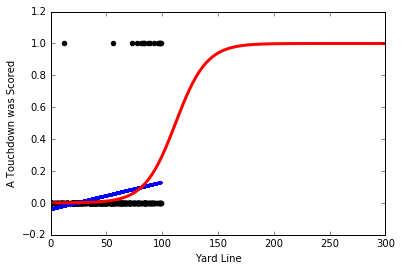

In [85]:

# Plot outputs
plt.scatter(nfldata_sm["YardLine"],nfldata_sm["IsTouchdown"],  color='black')
plt.xlim(0,300)
plt.plot(X, lm.predict(X), color='blue',lw=3)
x = np.linspace(0, 300, 100)
x = polynomial_basis (x, 1)
#plt.plot(x, logitm.predict_proba(x),  color='red' , lw=3)
plt.plot(x, logitm.predict_proba(x)[:,1],  color='red' , lw=3)
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")

plt.show()


In [80]:
X2 = polynomial_basis (nfldata_sm["IsPass"], 1)
logitm.fit (X2,nfldata_sm["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Y=nfldata_sm["IsTouchdown"]
#passes=nfldata["IsPass"0]==0
print(np.mean(Y[nfldata["IsPass"]==0]))
print(np.mean(Y[nfldata["IsPass"]==1]))


Estimated beta1: 
 [[ 3.13593754]]
Estimated beta0: 
 [-5.68016099]
0.003401360544217687
0.07281553398058252
